In [1]:
import numpy as np
import pandas as pd
import random
from scipy.stats import zscore
import os
working_dir = "/Users/nkarisan/PycharmProjects/BTC_Cell_Line_Atlas_Manuscript"
os.chdir(working_dir)

import scripts.io_library as io_library
io_library.input_dir = 'input_data/'
io_library.output_dir = 'Figure3/output_fig3/'

from scripts.io_library import MyLib
from scripts.utils import Utils

In [2]:
import matplotlib
seed = 2023
random.seed(seed)
np.random.seed(seed)

matplotlib.use("nbagg")


%matplotlib inline
%config InlineBackend.figure_format = "retina"


%load_ext autoreload
%autoreload 2

# Load datasets

In [3]:
gene_effect_file = 'Main_Data/CRISPR/CRISPR.csv'
gene_effect_df = MyLib.load_csv(gene_effect_file, index_col=0)
print(gene_effect_df.shape)
upset_file = 'cell_lines_master_upset_2025-2-24.csv'
raw_upset_df = MyLib.load_csv(upset_file, index_col=0)
upset_df = raw_upset_df[(raw_upset_df['CRISPR']==1) & (raw_upset_df['Subtype'] != 'HCC')]

gene_effect_df = gene_effect_df[upset_df.index]
gene_effect_df.shape

input_data/Main_Data/CRISPR/CRISPR.csv  is loaded, shape:  (18443, 60)

(18443, 60)
input_data/cell_lines_master_upset_2025-2-24.csv  is loaded, shape:  (87, 11)



(18443, 39)

In [4]:
model_file = 'Additional_Data/DepMap/Model.csv'
raw_model_df = MyLib.load_csv(model_file, index_col=0)
raw_model_df['OncotreePrimaryDisease'] = raw_model_df['OncotreePrimaryDisease'].apply(lambda x: x.strip())

input_data/Additional_Data/DepMap/Model.csv  is loaded, shape:  (1111, 29)



In [5]:
gene_effect_all_file = 'Additional_Data/DepMap/CRISPRGeneEffect.csv'
gene_effect_all_df = MyLib.load_csv(gene_effect_all_file, index_col=0)
gene_effect_all_zscore_df = zscore(gene_effect_all_df)

input_data/Additional_Data/DepMap/CRISPRGeneEffect.csv  is loaded, shape:  (1100, 18443)



# PDAC

In [6]:
disease = 'Pancreatic Adenocarcinoma'
model_df = raw_model_df[raw_model_df['OncotreePrimaryDisease'] == disease]
print(len(model_df))
indices = sorted(set.intersection(set(model_df.index.values), set(gene_effect_all_zscore_df.index)))
pdac_gene_effectl_zscore_df = gene_effect_all_zscore_df.loc[indices, :]
pdac_top_genes_df = pdac_gene_effectl_zscore_df.T.apply(lambda x: x.sort_values()[:20].index.to_list())
print(pdac_top_genes_df.shape)
pdac_top_genes_df.head()

45
(20, 45)


,ACH-000022,ACH-000023,ACH-000042,ACH-000060,ACH-000085,ACH-000093,ACH-000094,ACH-000114,ACH-000118,ACH-000138,...,ACH-001353,ACH-001375,ACH-001377,ACH-001379,ACH-001380,ACH-001382,ACH-001999,ACH-002039,ACH-002186,ACH-002672
0,FZD5 (7855),WDR48 (57599),CCDC157 (550631),PLRG1 (5356),ITGA7 (3679),SERPINF1 (5176),WNT7B (7477),ACTMAP (284325),NR1H2 (7376),RASSF8 (11228),...,PRPS1 (5631),AMPD2 (271),RBM34 (23029),CDC25A (993),FAM83D (81610),NR3C1 (2908),FZD5 (7855),PLCD1 (5333),CLEC2B (9976),FZD5 (7855)
1,WLS (79971),THG1L (54974),MGAT3 (4248),CREBBP (1387),RAX2 (84839),TRA2A (29896),FZD5 (7855),HIPK4 (147746),PEX2 (5828),FZD5 (7855),...,ITGA3 (3675),IER3IP1 (51124),BAMBI (25805),CTNNA1 (1495),SLC12A7 (10723),RNF122 (79845),PEX6 (5190),CNN1 (1264),HGF (3082),AGR2 (10551)
2,ZNRF3 (84133),LAS1L (81887),SEC14L6 (730005),CDH1 (999),GPR182 (11318),PITX1 (5307),WLS (79971),DYRK1B (9149),NFYA (4800),CFAP97D1 (284067),...,SLC11A2 (4891),PPARG (5468),NOTCH2 (4853),ELMO3 (79767),ATR (545),AKAP13 (11214),GRK2 (156),TRMT2B (79979),LYPD6 (130574),WNT7B (7477)
3,CTNNB1 (1499),ECHS1 (1892),ID1 (3397),TMEM61 (199964),ZNF530 (348327),L1CAM (3897),LRP5 (4041),KCNC3 (3748),ACOX1 (51),TMUB2 (79089),...,ATP6V0A1 (535),GALNS (2588),BCAP31 (10134),PPARG (5468),MBOAT7 (79143),EMILIN1 (11117),WLS (79971),CCR8 (1237),MTHFD2L (441024),DVL1 (1855)
4,TCF7L2 (6934),DNMT1 (1786),SYN3 (8224),BCAR3 (8412),CHST6 (4166),N4BP2L1 (90634),EDF1 (8721),BLVRB (645),CLASRP (11129),SRC (6714),...,SPPL3 (121665),STIP1 (10963),TRIT1 (54802),NUDT13 (25961),KCNK5 (8645),SYNJ2BP (55333),ABCD1 (215),ITIH4 (3700),ACBD7 (414149),PORCN (64840)


In [7]:
MyLib.save_csv(pdac_top_genes_df, f'selected_genes_{disease}.csv', index=False)
pdac_freq_genes_df = Utils.frequent_essential_genes(pdac_top_genes_df, disease=disease)
print(len(pdac_freq_genes_df))
pdac_freq_genes_df.head()


File  Figure3/output_fig3/selected_genes_Pancreatic Adenocarcinoma.csv saved, shape: (20, 45)
Sorted list of genes and their frequencies:

File  Figure3/output_fig3/Pancreatic Adenocarcinoma_Preferential Dependencies.csv saved, shape: (768,)
768


KRAS     8
FZD5     7
ID1      6
WLS      5
HNF1B    5
Name: count, dtype: int64

# HCC

In [8]:
disease = 'Hepatocellular Carcinoma'
model_df = raw_model_df[raw_model_df['OncotreePrimaryDisease'] == disease]
print(len(model_df))
indices = sorted(set.intersection(set(model_df.index.values), set(gene_effect_all_zscore_df.index)))
hcc_gene_effect_zscore_df = gene_effect_all_zscore_df.loc[indices, :]
hcc_top_genes_df = hcc_gene_effect_zscore_df.T.apply(lambda x: x.sort_values()[:20].index.to_list())
print(hcc_top_genes_df.shape)
hcc_top_genes_df.head()

23
(20, 21)


,ACH-000217,ACH-000221,ACH-000316,ACH-000361,ACH-000393,ACH-000420,ACH-000422,ACH-000471,ACH-000475,ACH-000476,...,ACH-000480,ACH-000483,ACH-000493,ACH-000537,ACH-000577,ACH-000620,ACH-000734,ACH-000848,ACH-001318,ACH-002523
0,SLC1A3 (6507),ATOX1 (475),FRMPD4 (9758),VASH1 (22846),AIMP1 (9255),STRN3 (29966),ESX1 (80712),FGFR1 (2260),TMEM245 (23731),ANKS3 (124401),...,KLB (152831),MYRF (745),ARID1B (57492),BICC1 (80114),KCNG4 (93107),SALL1 (6299),TRIB1 (10221),KLB (152831),ONECUT1 (3175),KDELR2 (11014)
1,UXS1 (80146),ECHS1 (1892),DEPDC5 (9681),PNMA8A (55228),EIF2AK4 (440275),TRIP4 (9325),ADPGK (83440),SEMA4B (10509),ENTPD5 (957),CDH2 (1000),...,NR5A2 (2494),CCNE1 (898),HS2ST1 (9653),CRB3 (92359),AQP9 (366),MECOM (2122),LIN28B (389421),TGS1 (96764),PITPNB (23760),ARF1 (375)
2,UMPS (7372),VDAC2 (7417),MYEOV (26579),GPX2 (2877),MED26 (9441),NPTX1 (4884),EME1 (146956),FHIP2A (57700),NFE2L2 (4780),UAP1 (6675),...,TRIM71 (131405),ZNF281 (23528),JUN (3725),KLHL42 (57542),TRPV1 (7442),TJP1 (7082),TMEM245 (23731),SRD5A3 (79644),DUSP1 (1843),UCP3 (7352)
3,PFKL (5211),TRIB3 (57761),SLC5A11 (115584),HCLS1 (3059),DNAH1 (25981),CERT1 (10087),GSTP1 (2950),SQSTM1 (8878),BAMBI (25805),FOXC2 (2303),...,FGFR4 (2264),GLE1 (2733),ATAD3A (55210),ID2 (3398),IFT43 (112752),PAX8 (7849),ARID3A (1820),NR5A2 (2494),TBL1X (6907),TWIST1 (7291)
4,POTED (317754),MPV17L2 (84769),ICMT (23463),PFKFB4 (5210),RHOG (391),LIN52 (91750),MADD (8567),SLC35B2 (347734),TAPT1 (202018),HNF1B (6928),...,HHEX (3087),TUBA8 (51807),PCSK7 (9159),MYL12A (10627),NPPB (4879),MIDEAS (91748),SLC25A33 (84275),TMEM181 (57583),SLC1A6 (6511),NOC4L (79050)


In [9]:
MyLib.save_csv(hcc_top_genes_df, f'selected_genes_{disease}.csv', index=False)
hcc_freq_genes_df = Utils.frequent_essential_genes(hcc_top_genes_df, disease=disease)
print(len(hcc_freq_genes_df))
hcc_freq_genes_df.head()


File  Figure3/output_fig3/selected_genes_Hepatocellular Carcinoma.csv saved, shape: (20, 21)
Sorted list of genes and their frequencies:

File  Figure3/output_fig3/Hepatocellular Carcinoma_Preferential Dependencies.csv saved, shape: (389,)
389


SMARCA2    3
SQSTM1     3
HNF1B      3
PNMA8A     2
TRIM71     2
Name: count, dtype: int64

# BTC

In [10]:
disease = 'Bile_duct'
indices = sorted(set.intersection(set(upset_df['DepMap_ID'].values), set(gene_effect_all_zscore_df.index)))
print(len(indices))
btc_gene_effect_zscore_df = gene_effect_all_zscore_df.loc[indices, :]
btc_gene_effect_zscore_df.reset_index(inplace=True)
btc_gene_effect_zscore_df['index'] = btc_gene_effect_zscore_df['index'].apply(lambda x: upset_df[upset_df['DepMap_ID'] == x].index.values[0]) # Use cell line ID instead of ModelID
btc_gene_effect_zscore_df.set_index('index', inplace=True)
btc_top_genes_df = btc_gene_effect_zscore_df.T.apply(lambda x: x.sort_values()[:20].index.to_list())
btc_top_genes_df.head()

39


index,SNU308,SNU869,SNU1079,SNU478,SNU1196,HUCCT1,EGI1,KKU100,KKU213,NOZ,...,TGBC1TKB,TGBC52TKB,TKKK,YSCCC,CCLP1,CCSW1,GB2,AOVC1,TGBC18TKB,CCC5
0,RXRA (6256),TUBB4B (10383),SIK1 (150094),H4C16 (121504),TNPO2 (30000),ATOX1 (475),PPARG (5468),DUSP1 (1843),CNOT9 (9125),LMNTD1 (160492),...,SEC11C (90701),MAPK7 (5598),DVL1 (1855),AKT2 (208),MTIF3 (219402),COPS7A (50813),PDS5B (23047),CRB3 (92359),MPI (4351),ZNF703 (80139)
1,ERBB2 (2064),ZNF526 (116115),ZBTB4 (57659),AIFM3 (150209),SURF2 (6835),TJP1 (7082),FITM2 (128486),SIM2 (6493),SEMA4B (10509),DNAI7 (55259),...,ASF1A (25842),VCPIP1 (80124),SDF4 (51150),CLPX (10845),DIAPH3 (81624),PPP2R5E (5529),ZEB1 (6935),CRK (1398),FBXL18 (80028),SPOCK3 (50859)
2,SREBF1 (6720),VAC14 (55697),HKDC1 (80201),IGLL5 (100423062),DNAI7 (55259),HSPA4 (3308),GRK2 (156),AKAP13 (11214),SELENOI (85465),ALG10 (84920),...,NEK1 (4750),PIP4K2A (5305),PRKCZ (5590),SMARCA2 (6595),SCLY (51540),FBXL12 (54850),GANAB (23193),PRKCI (5584),ASNS (440),PLAT (5327)
3,RARG (5916),UBE2Z (65264),ALKBH6 (84964),VPREB1 (7441),RBM5 (10181),CTNND1 (1500),NPEPPS (9520),CSTF2T (23283),DGKD (8527),IRAG2 (4033),...,TPK1 (27010),DOCK5 (80005),KLHL21 (9903),SLC39A6 (25800),PHIP (55023),NR5A1 (2516),ZBTB7A (51341),F11R (50848),LDHA (3939),MPND (84954)
4,DLGAP1 (9229),NDUFB7 (4713),BMAL2 (56938),CTSW (1521),PRDM16 (63976),TP53BP2 (7159),KRAS (3845),GYG2 (8908),ITGA3 (3675),SHMT2 (6472),...,GPR151 (134391),MARK3 (4140),FAAP20 (199990),SMCHD1 (23347),MTG1 (92170),PEX11B (8799),RAB35 (11021),CDH1 (999),CENPT (80152),PLPP5 (84513)


In [11]:
MyLib.save_csv(btc_top_genes_df, f'selected_genes_{disease}.csv', index=False)
btc_freq_genes_df = Utils.frequent_essential_genes(btc_top_genes_df, disease=disease)
print(len(btc_freq_genes_df))
btc_freq_genes_df.head()


File  Figure3/output_fig3/selected_genes_Bile_duct.csv saved, shape: (20, 39)
Sorted list of genes and their frequencies:

File  Figure3/output_fig3/Bile_duct_Preferential Dependencies.csv saved, shape: (705,)
705


SREBF1    4
VAC14     4
PRKCI     4
SQSTM1    3
DOCK5     3
Name: count, dtype: int64

# Preferential genes across BTC, HCC, and HDAC

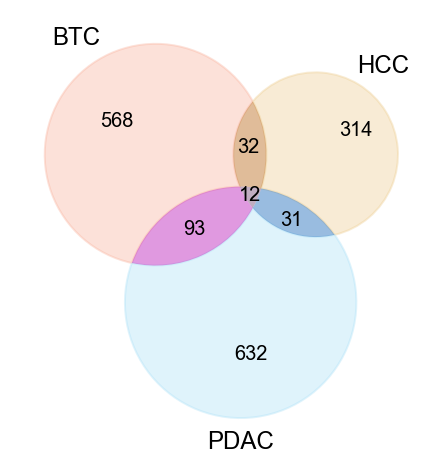

In [12]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

btc = set(btc_freq_genes_df.index)
pdac = set(pdac_freq_genes_df.index)
hcc = set(hcc_freq_genes_df.index)
venn = venn3([btc, hcc, pdac], ('BTC', 'HCC', 'PDAC'))

venn.get_patch_by_id('100').set_color('#F9B6A2')  # Set BTC
venn.get_patch_by_id('010').set_color('#EECF96')  # Set HCC
venn.get_patch_by_id('001').set_color('#B0E2F7')  # Set PDAC

plt.title("")
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.savefig(os.path.join(io_library.output_dir,f"venn_diagram_preferential_dependencies.pdf"), dpi=600)
plt.show()

# BTC - Using DepMap lines (public & unpublished)

The list of BTC preferentially dependent genes used in the rest of the analyses was initially calculated using all public and unpublished DepMap cell lines. Here, we used the mean and standard deviation obtained from that dataset to recalculate the list.

The output file "BTC_Preferential Dependencies.csv" should be placed in "input_data/Additional_Data/Selected_Lists".

In [13]:
mean_std_file = 'Additional_Data/Selected_Lists/mean_std_values.csv'
mean_std_df = MyLib.load_csv(mean_std_file, index_col=0)
mean_std_df.head()

input_data/Additional_Data/Selected_Lists/mean_std_values.csv  is loaded, shape:  (16666, 2)



,mean,std
A1BG (1),-0.045566,0.109247
A1CF (29974),-0.075957,0.113877
A2M (2),0.045152,0.102473
A2ML1 (144568),0.036685,0.102314
A3GALT2 (127550),-0.074244,0.126203


In [14]:
gene_effect_filtered_df = gene_effect_df.loc[mean_std_df.index]
gene_effect_filtered_df = gene_effect_filtered_df.T
gene_effect_filtered_df.shape

(39, 16666)

In [15]:
gene_effect_zscore_manual_df = (gene_effect_filtered_df - mean_std_df['mean']) / mean_std_df['std']
top_genes_df = gene_effect_zscore_manual_df.T.apply(lambda x: x.sort_values()[:20].index.to_list())
genes_l = [g for g in sorted(set(top_genes_df.values.flatten())) if g in gene_effect_df.columns]
print(len(genes_l))
top_genes_df

0


,SNU869,SNU478,TGBC52TKB,AOVC1,TGBC18TKB,SNU1196,EGI1,KKU100,TFK1,ECC3,...,ICC9,HKGZCC,KMCH1,RBE,SG231,SSP25,TKKK,YSCCC,CCLP1,CCSW1
0,TUBB4B (10383),H4C16 (121504),MAPK7 (5598),CRB3 (92359),FBXL18 (80028),TNPO2 (30000),PPARG (5468),DUSP1 (1843),FLOT2 (2319),POLQ (10721),...,ERMP1 (79956),YIPF6 (286451),HDAC1 (3065),PRPS1 (5631),CSMD3 (114788),NFE2L2 (4780),DVL1 (1855),CLPX (10845),MTIF3 (219402),COPS7A (50813)
1,ZNF526 (116115),AIFM3 (150209),DOCK5 (80005),CRK (1398),MPI (4351),SURF2 (6835),GRK2 (156),SIM2 (6493),FLOT1 (10211),CIP2A (57650),...,WASF2 (10163),SCYL1 (57410),BAG5 (9529),MBTD1 (54799),XDH (7498),THAP7 (80764),SDF4 (51150),SLC39A6 (25800),DIAPH3 (81624),PPP2R5E (5529)
2,VAC14 (55697),VPREB1 (7441),VCPIP1 (80124),PRKCI (5584),ASNS (440),RBM5 (10181),FITM2 (128486),AKAP13 (11214),MCTS1 (28985),RHNO1 (83695),...,FERMT1 (55612),PRUNE1 (58497),INSRR (3645),NLGN3 (54413),MYH3 (4621),MMACHC (25974),PRKCZ (5590),SMARCA2 (6595),SCLY (51540),FBXL12 (54850)
3,NDUFB7 (4713),CTSW (1521),PIP4K2A (5305),F11R (50848),LDHA (3939),DNAI7 (55259),KRAS (3845),CSTF2T (23283),FIG4 (9896),TEX30 (93081),...,PRR30 (339779),MYL12B (103910),NUSAP1 (51203),ARL4C (10123),MAGEE1 (57692),MMP8 (4317),FAAP20 (199990),SMCHD1 (23347),MTG1 (92170),NR5A1 (2516)
4,UBE2Z (65264),CRTC2 (200186),MARK3 (4140),CDH1 (999),CENPT (80152),PRDM16 (63976),NPEPPS (9520),GYG2 (8908),CLPB (81570),XRCC1 (7515),...,HSBP1 (3281),OSBPL11 (114885),DAO (1610),USP22 (23326),HEATR9 (256957),IQGAP3 (128239),HES3 (390992),TRUB1 (142940),PHIP (55023),PEX11B (8799)
5,SEC24C (9632),CXCL2 (2920),BMAL1 (406),TNS3 (64759),GGNBP2 (79893),CCSAP (126731),EPS8L2 (64787),ETV5 (2119),EXOC1 (55763),C1orf112 (55732),...,ABI1 (10006),SNAI2 (6591),SFTA2 (389376),PRKCI (5584),SAV1 (60485),PGR (5241),KLHL21 (9903),ATOSA (56204),MAN1A2 (10905),PTPMT1 (114971)
6,MRPS26 (64949),ZNF280A (129025),MECOM (2122),IRF6 (3664),ALDH18A1 (5832),LMNTD1 (160492),DEGS1 (8560),ARHGDIA (396),MTX2 (10651),GLMN (11146),...,PIGT (51604),MARK2 (2011),SCN5A (6331),PARD3 (56288),MYH7 (4625),MMP27 (64066),SREBF2 (6721),CUL4B (8450),MRPL14 (64928),RPP14 (11102)
7,NDUFAF5 (79133),CABP5 (56344),TGFBR1 (7046),TP53BP2 (7159),ERBB2 (2064),TPM3 (7170),DOCK5 (80005),GPR31 (2853),VAC14 (55697),MYL6 (4637),...,PIGU (128869),ATPAF2 (91647),DNAJA2 (10294),ATRN (8455),TPTE2 (93492),ARHGAP29 (9411),GABRD (2563),ZNF524 (147807),HS6ST1 (9394),GAREM1 (64762)
8,NDUFS5 (4725),ICAM3 (3385),PEDS1 (387521),RNF121 (55298),PIF1 (80119),BMAL2 (56938),YAF2 (10138),ISG15 (9636),GLS (2744),ATM (472),...,KRTAP10-11 (386678),MED7 (9443),TMEM41A (90407),PPP1R16A (84988),GALNT16 (57452),TMEM123 (114908),LRRC47 (57470),SHISA7 (729956),USP36 (57602),C3orf38 (285237)
9,MRPS18B (28973),FAM221B (392307),MAP2K5 (5607),PARD6B (84612),DCPS (28960),AURKA (6790),RPS21 (6227),HNRNPA0 (10949),UXS1 (80146),TNFAIP3 (7128),...,LRRC37B (114659),TNS4 (84951),LINGO4 (339398),PCBD1 (5092),CNMD (11061),TGIF1 (7050),MORN1 (79906),CLPP (8192),MTRFR (91574),POP4 (10775)


In [16]:
Utils.frequent_essential_genes(top_genes_df, disease='BTC')

Sorted list of genes and their frequencies:

File  Figure3/output_fig3/BTC_Preferential Dependencies.csv saved, shape: (696,)


VAC14     4
SREBF1    4
PRKCI     4
TUBB4B    3
DOCK5     3
         ..
CLPX      1
CAMTA1    1
HES3      1
ATOSA     1
ARF1      1
Name: count, Length: 696, dtype: int64